## Project Objective

* Develop a predictive model to determine if an individual's income exceeds 50K.
* Identify the key factors contributing to higher incomes.

## Importing the Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

np.random.seed(155)
import warnings
warnings.filterwarnings('ignore')

## Data Assessment

In [3]:
df = pd.read_csv('Data_inc.csv')
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [4]:
df.shape

(32561, 16)

    The dataset consists of 32,561 rows and 16 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [6]:
# Drop insignificant feature
df.drop(['Unnamed: 15'], axis =1, inplace =True)

In [7]:
# Function to know about columns
def columns():
    print(f'Columns:\n\n{df.columns.tolist()}\n\nNo. of columns: {len(df.columns)}\n')
    print('*'*100)
    print(f'Object columns:\n\n{df.select_dtypes(include="object").columns.tolist()}\n\nNo. of object columns: {len(df.select_dtypes(include="object").columns)}\n')
    print('*'*100)
    print(f'Integer columns:\n\n{df.select_dtypes(include="int64").columns.tolist()}\n\nNo. of integer columns: {len(df.select_dtypes(include="int64").columns)}')

columns()

Columns:

['Age', 'Profession Class', 'Final_census', ' Education', ' Education-num', ' marital-status', ' occupation', ' relationship', ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week', ' country', ' income']

No. of columns: 15

****************************************************************************************************
Object columns:

['Profession Class', ' Education', ' marital-status', ' occupation', ' relationship', ' race', 'Gender', ' country', ' income']

No. of object columns: 9

****************************************************************************************************
Integer columns:

['Age', 'Final_census', ' Education-num', ' capital-gain', ' capital-loss', ' hours-per-week']

No. of integer columns: 6


In [8]:
df.select_dtypes(include = 'object').columns

Index(['Profession Class', ' Education', ' marital-status', ' occupation',
       ' relationship', ' race', 'Gender', ' country', ' income'],
      dtype='object')

In [9]:
# There is a space in column names. So, here it's getting corrected.
df.rename(str.lstrip, axis = 'columns', inplace = True)

In [10]:
# Space is removed now.
columns()

Columns:

['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num', 'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income']

No. of columns: 15

****************************************************************************************************
Object columns:

['Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'country', 'income']

No. of object columns: 9

****************************************************************************************************
Integer columns:

['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

No. of integer columns: 6


In [11]:
df.info

<bound method DataFrame.info of        Age   Profession Class  Final_census    Education  Education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    r

### 1. Unique values count for each variable

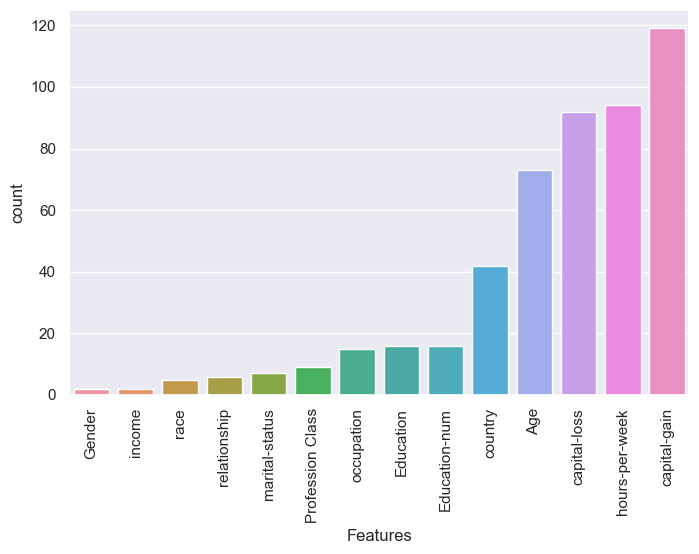

In [12]:
unq = pd.DataFrame(df.nunique(),columns = ['count'] )
unq = unq.reset_index().rename(columns = {'index':'Features'})
unq = unq.sort_values(by = 'count', ignore_index = True)

plt.figure(figsize=(8, 5))
sns.barplot(x = unq[unq['count']<120]['Features'], y=unq[unq['count']<120]['count'])
plt.xticks(rotation = 90)
plt.show()

**The variable 'Final_census' is having '21648' unique values.**

In [13]:
unq

,Features,count
0,Gender,2
1,income,2
2,race,5
3,relationship,6
4,marital-status,7
5,Profession Class,9
6,occupation,15
7,Education,16
8,Education-num,16
9,country,42


### 2. Special Character check

In [14]:
for i in df.columns:
    if i != 'Final_census':
        print(f'{i}:\n {set(df[i].tolist())}\n')

Age:
 {17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90}

Profession Class:
 {' Federal-gov', ' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay', ' Never-worked', ' Local-gov', ' Private', ' ?', ' State-gov'}

Education:
 {' 12th', ' Bachelors', ' Doctorate', ' 5th-6th', ' Preschool', ' 11th', ' HS-grad', ' 10th', ' Assoc-acdm', ' Some-college', ' Masters', ' 7th-8th', ' 1st-4th', ' 9th', ' Prof-school', ' Assoc-voc'}

Education-num:
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

marital-status:
 {' Married-AF-spouse', ' Never-married', ' Separated', ' Widowed', ' Divorced', ' Married-civ-spouse', ' Married-spouse-absent'}

occupation:
 {' Tech-support', ' Armed-Forces', ' Other-service', ' Transport-moving', ' Protective-serv', ' Craf

In [15]:
# "?" character check for variable "Final_cenusus"
df[df['Final_census']==' ?']

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income


**Upon reviewing the above data, we observed that the following variables contain the character '?'.**

**1. Profession Class**<br>
**2. Occupation**<br>
**3. Country**

### 3. Check Null values

In [16]:
df.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
Education-num       0
marital-status      0
occupation          0
relationship        0
race                0
Gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
country             0
income              0
dtype: int64

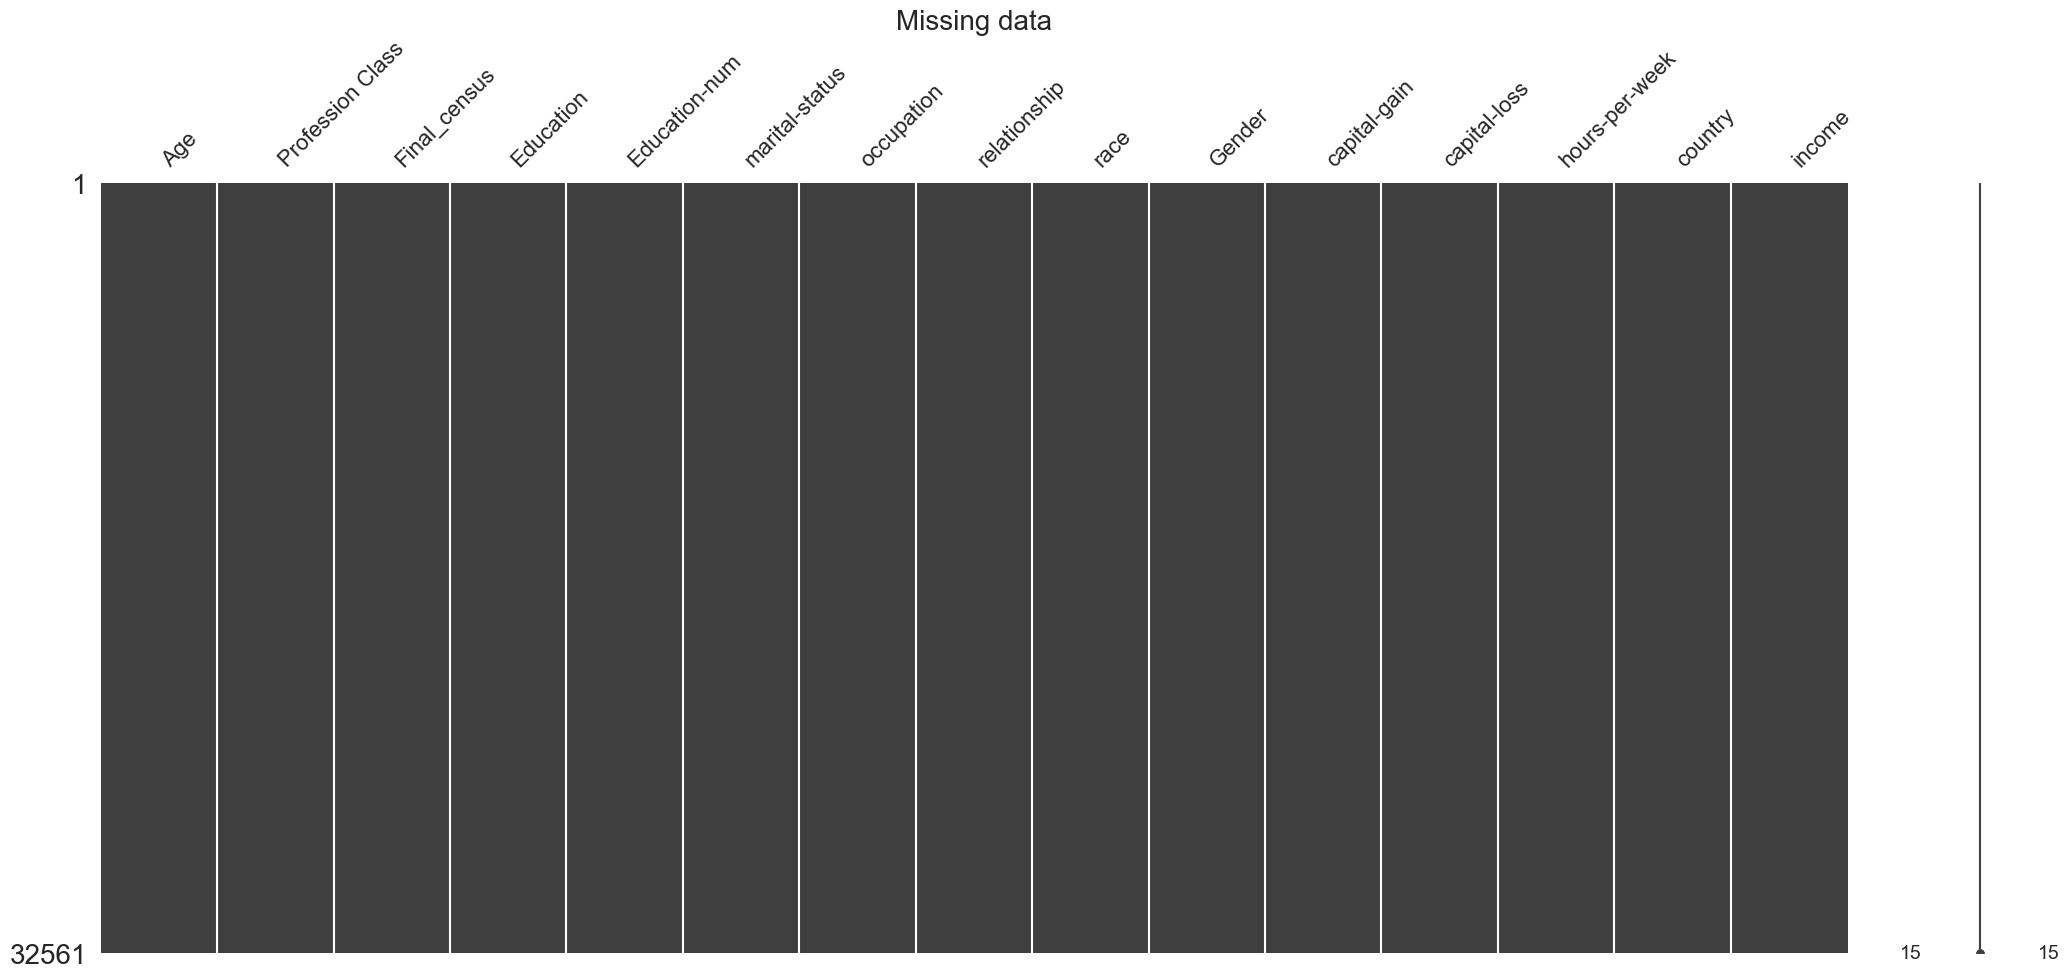

In [17]:
import missingno as msn
missing = msn.matrix(df)
missing.set_title("Missing data", fontsize= 20)
plt.show()

**This data does not contain any missing values.**

### 4. Check Duplicate Values

In [18]:
print(f'Duplicate value count: {(df.duplicated().sum())} ({(df.duplicated().sum()/len(df)*100).round(2)}%)')

Duplicate value count: 24 (0.07%)


### 5. Check Outliers

In [19]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df.select_dtypes(include = ['int']).columns

Index(['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

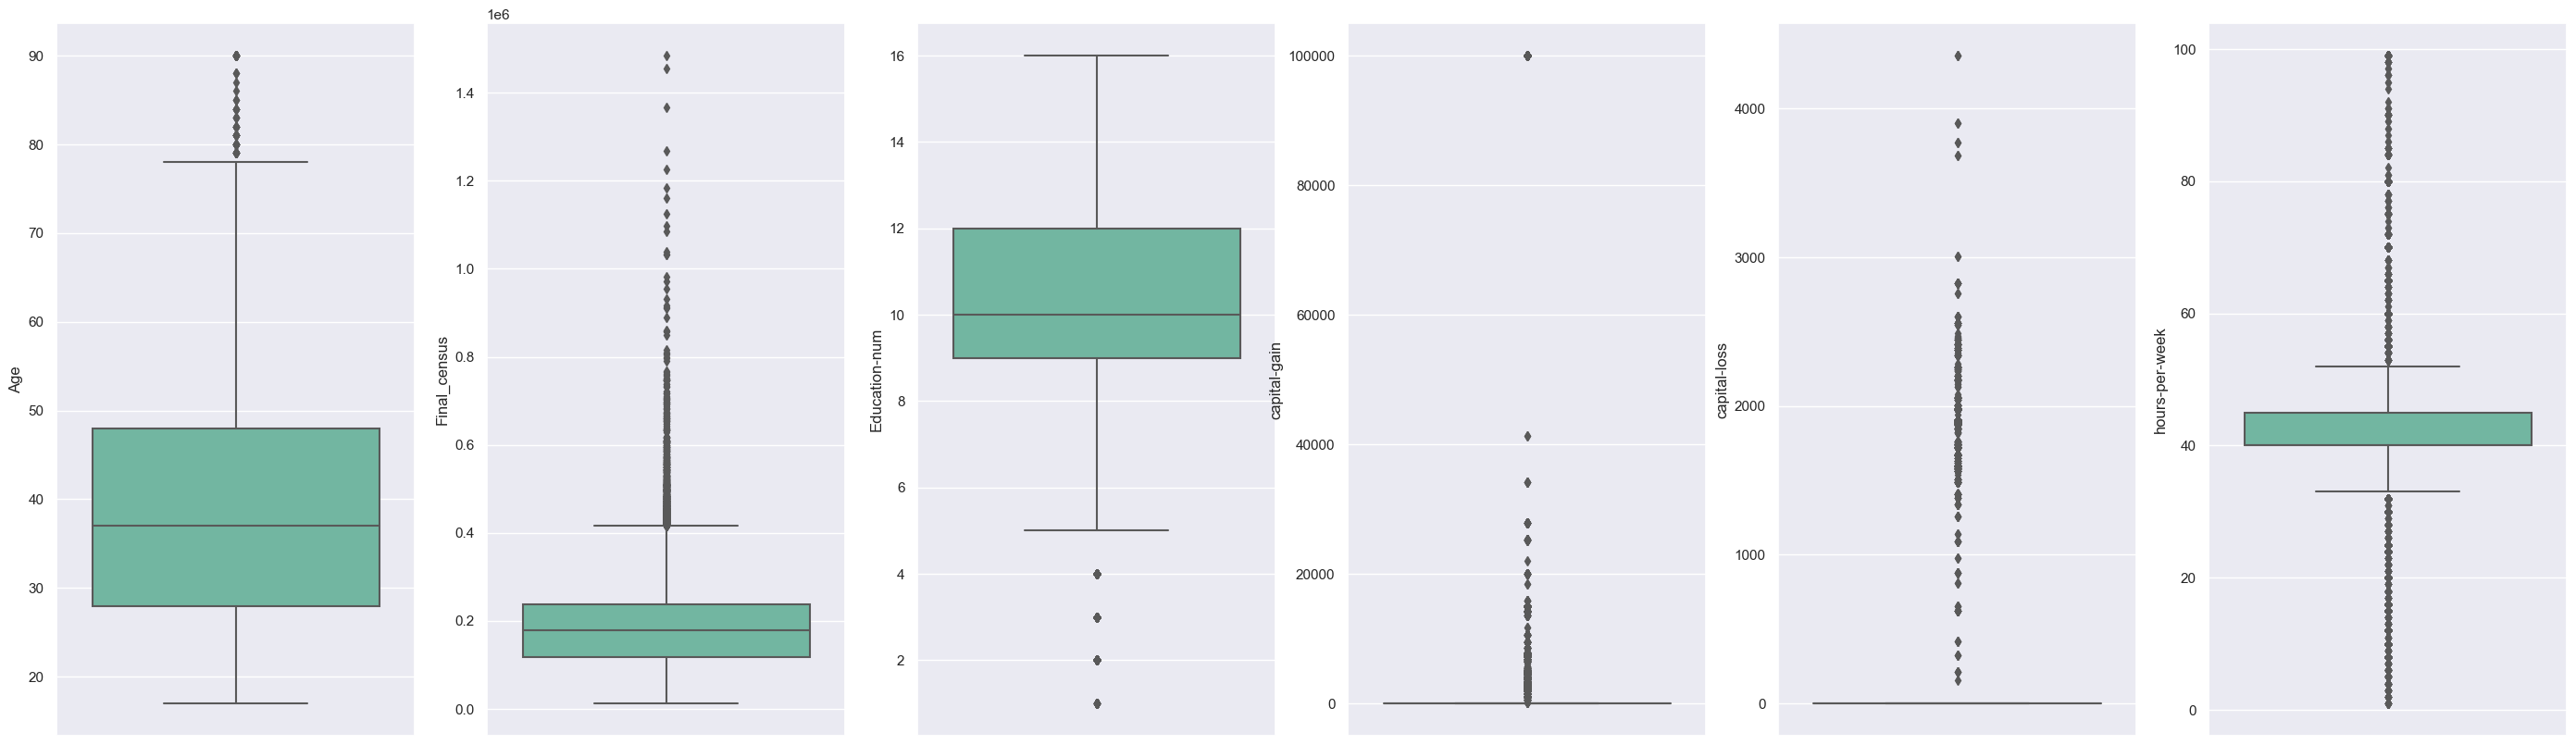

In [21]:
plt.figure(figsize=(35,10), dpi=100)
for a,i in enumerate(df.select_dtypes(include = ['int']).columns):
    plt.subplot(1,6,a+1)
    sns.boxplot(y = df[i], data = df, palette = 'Set2')
    plt.show
    

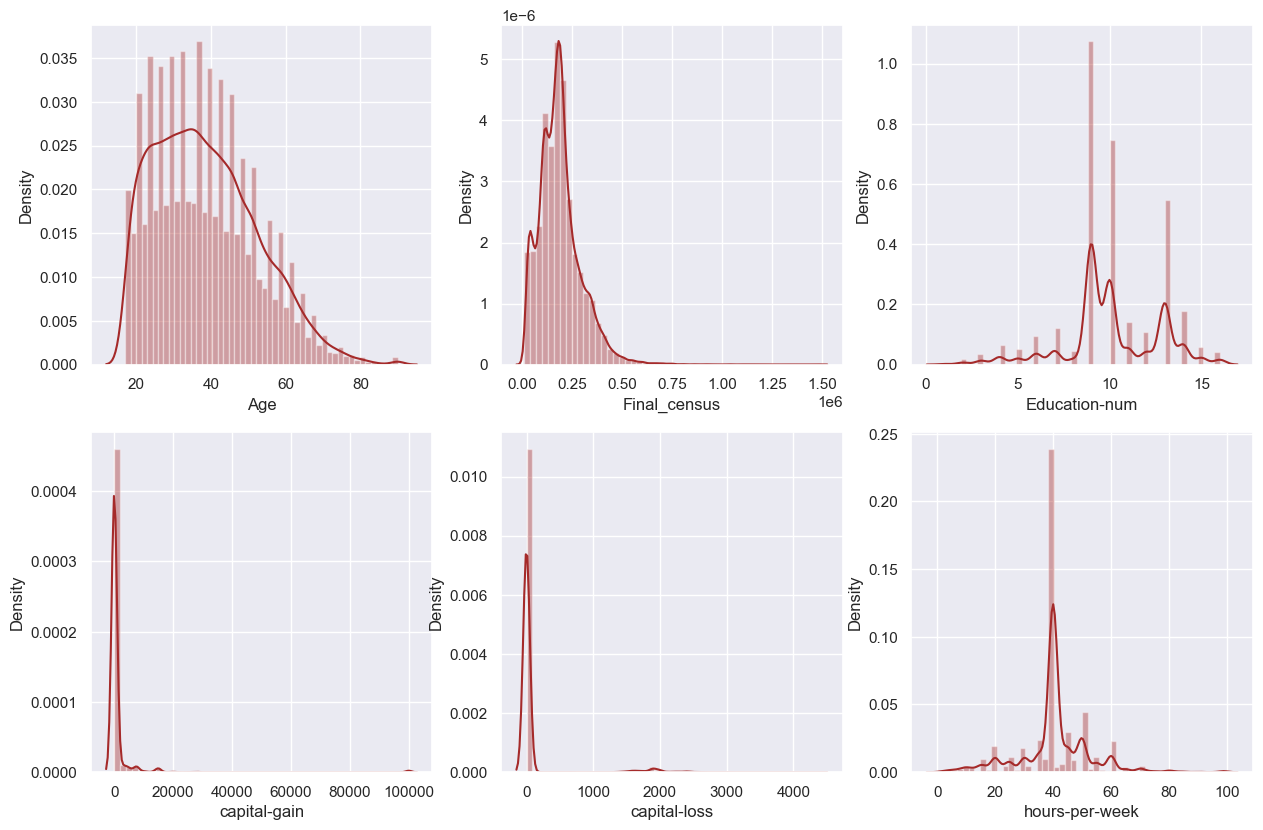

In [22]:
plt.figure(figsize = (15,15))

for a, i in enumerate(df.select_dtypes(include = 'int').columns):
    plt.subplot(3,3,a+1)
    sns.distplot(df[i],color = 'brown')
plt.show()
    

### 6.Correlation

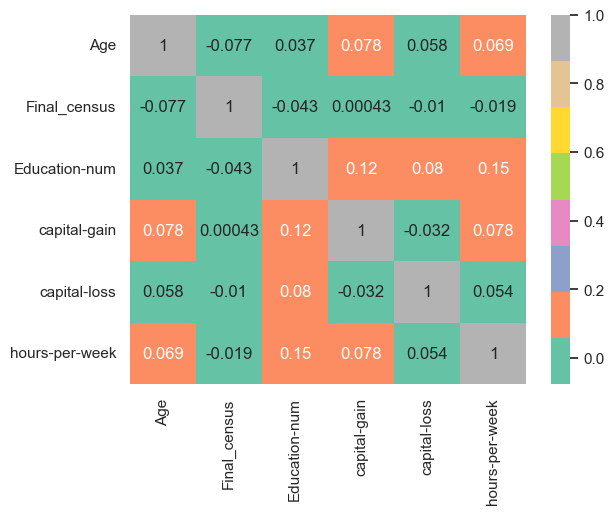

In [23]:
sns.heatmap(data = df.corr(), annot = True, cmap = 'Set2')
plt.show()

## Data Preprocessing

### 1. Handling special Character

In [24]:
# Profession Class
# occupation
# country

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  country           32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
# Character "?" is replaced with mode value of variable.
df['occupation'] = df['occupation'].apply(lambda x: df['occupation'].mode()[0] if x == ' ?' else x)

df['Profession Class'] = df['Profession Class'].apply(lambda x: df['Profession Class'].mode()[0] if x == ' ?' else x)

df['country'] = df['country'].apply(lambda x: df['country'].mode()[0] if x == ' ?' else x)

In [27]:
for i in df.columns:
    if i != 'Final_census':
        print(f'{i}:\n {set(df[i].tolist())}\n')

Age:
 {17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90}

Profession Class:
 {' Federal-gov', ' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay', ' Never-worked', ' Local-gov', ' Private', ' State-gov'}

Education:
 {' 12th', ' Bachelors', ' Doctorate', ' 5th-6th', ' Preschool', ' 11th', ' HS-grad', ' 10th', ' Assoc-acdm', ' Some-college', ' Masters', ' 7th-8th', ' 1st-4th', ' 9th', ' Prof-school', ' Assoc-voc'}

Education-num:
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

marital-status:
 {' Married-AF-spouse', ' Never-married', ' Separated', ' Widowed', ' Divorced', ' Married-civ-spouse', ' Married-spouse-absent'}

occupation:
 {' Tech-support', ' Armed-Forces', ' Other-service', ' Transport-moving', ' Protective-serv', ' Craft-repa

**Here, we have finished processing the character '?'. In the above data, we replaced the character '?' with the mode value of the variable.**

### 2. Removing Space in object variable values

In [28]:
# space is getting treated here.
for i in df.columns[df.dtypes == 'object']:
    df[i] = df[i].apply(str.lstrip)

In [29]:
for i in df.columns[df.dtypes == 'object']:
    if i != 'Final_census':
        print(f'{i}:\n {set(df[i].tolist())}\n')

Profession Class:
 {'Federal-gov', 'State-gov', 'Self-emp-inc', 'Local-gov', 'Self-emp-not-inc', 'Never-worked', 'Private', 'Without-pay'}

Education:
 {'5th-6th', 'Doctorate', 'HS-grad', 'Assoc-voc', '10th', '7th-8th', '1st-4th', 'Some-college', 'Assoc-acdm', 'Preschool', '11th', 'Prof-school', 'Masters', '12th', '9th', 'Bachelors'}

marital-status:
 {'Never-married', 'Separated', 'Married-spouse-absent', 'Married-civ-spouse', 'Divorced', 'Widowed', 'Married-AF-spouse'}

occupation:
 {'Exec-managerial', 'Transport-moving', 'Other-service', 'Sales', 'Armed-Forces', 'Handlers-cleaners', 'Farming-fishing', 'Priv-house-serv', 'Prof-specialty', 'Adm-clerical', 'Craft-repair', 'Protective-serv', 'Tech-support', 'Machine-op-inspct'}

relationship:
 {'Own-child', 'Unmarried', 'Not-in-family', 'Husband', 'Other-relative', 'Wife'}

race:
 {'White', 'Asian-Pac-Islander', 'Other', 'Black', 'Amer-Indian-Eskimo'}

Gender:
 {'Female', 'Male'}

country:
 {'Cambodia', 'Scotland', 'Ecuador', 'Laos', 'M

**It has been noticed that the values of object variables contain leading spaces. Therefore, these spaces have been removed.**

### 3. Handling duplicate values

In [30]:
# Duplicate values are getting removed
df.drop_duplicates(inplace = True)

In [31]:
df.duplicated().sum()

0

In [32]:
df.to_excel('corrected_income_data.xlsx', index = False)

In [33]:
min(df['capital-loss'])

0

In [34]:
max(df['capital-gain'])

99999

## Data exploration

**Here, we aim to glean insights from the data that could aid in understanding the key factors contributing to higher incomes**

In [35]:
df.columns[df.dtypes == 'object']

Index(['Profession Class', 'Education', 'marital-status', 'occupation',
       'relationship', 'race', 'Gender', 'country', 'income'],
      dtype='object')

In [36]:
unq

,Features,count
0,Gender,2
1,income,2
2,race,5
3,relationship,6
4,marital-status,7
5,Profession Class,9
6,occupation,15
7,Education,16
8,Education-num,16
9,country,42


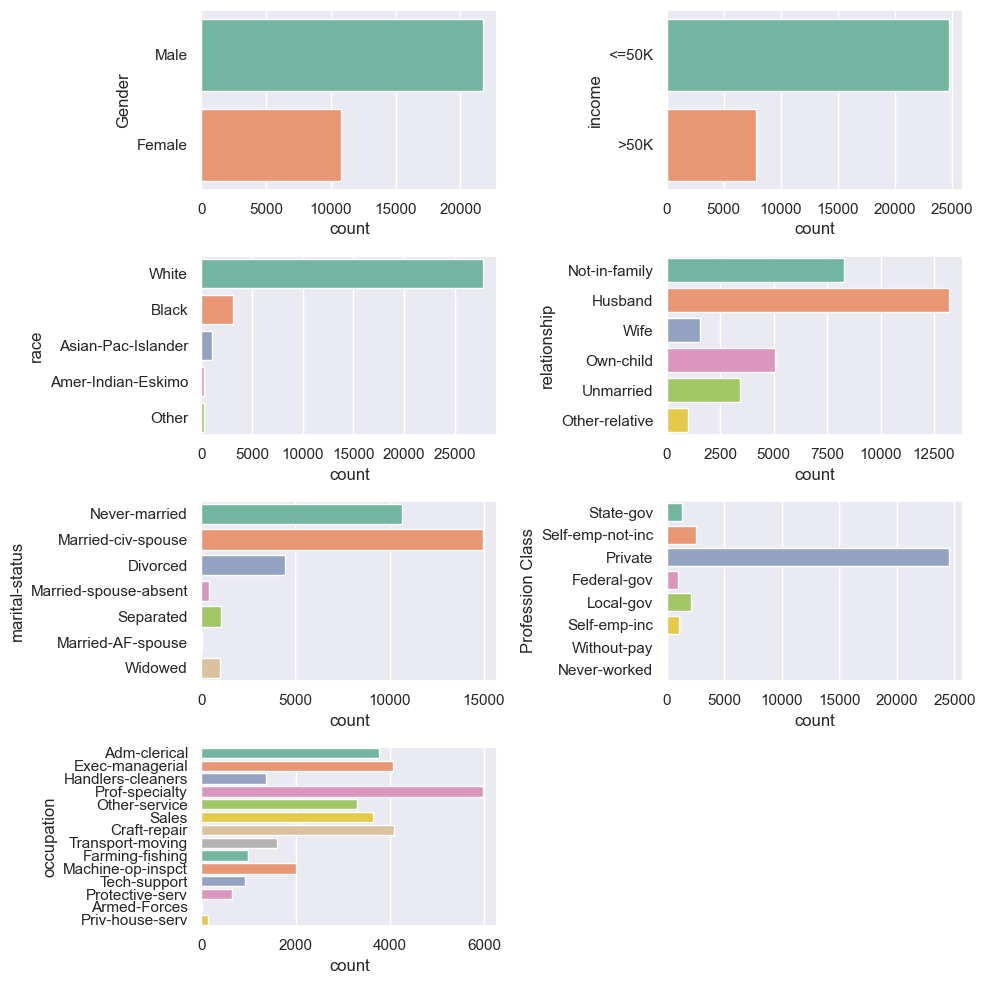

In [37]:
plt.figure(figsize = (10, 10), dpi =100)
for a, i in enumerate(unq['Features'][0:7].tolist()):
        plt.subplot(4,2,a+1)
        sns.countplot(y= df[i], data =df,palette='Set2') #color = 'orange')
        
    
plt.tight_layout()
plt.show()

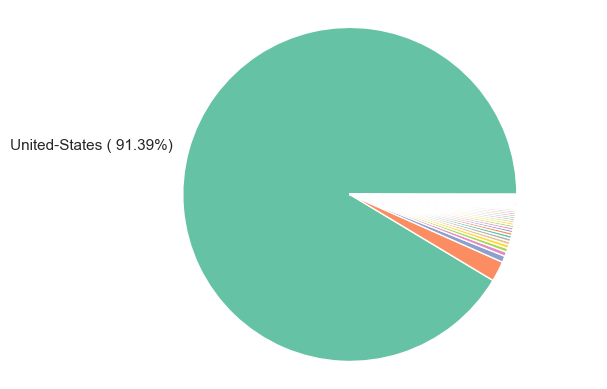

In [38]:
labels = df['country'].value_counts().index.tolist()
sizes = df['country'].value_counts().values.tolist()
max_index = max(df['country'].value_counts().values)
per_size = (max_index/sum(df['country'].value_counts().values))*100
custom_labels = [f'{label} ({per_size: 0.2f}%)' if size == max_index else '' for label, size in (zip(labels, sizes))]

sns.set_palette('Set2')
plt.pie(sizes, labels=custom_labels, autopct='')

plt.axis('equal')
plt.show()

**The United States has the largest population among all other countries.**

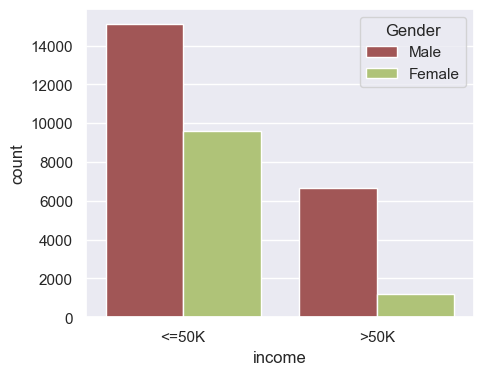

In [39]:
plt.figure(figsize = (5,4))
sns.countplot(x = df['income'], hue=df['Gender'], palette='tab20b_r')
plt.show()

**Here, males are more prominent than females. Even when expecting income exceeding 50K, males are more prominent.**

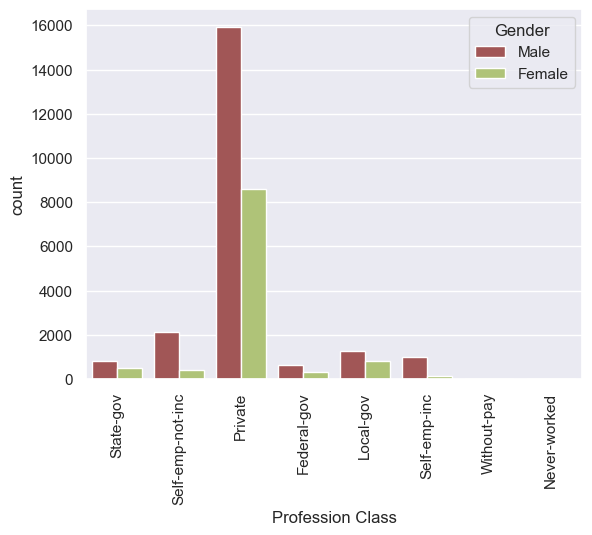

In [40]:
sns.countplot(x = df['Profession Class'], hue=df['Gender'], palette='tab20b_r')
plt.xticks(rotation = 90)
plt.show()

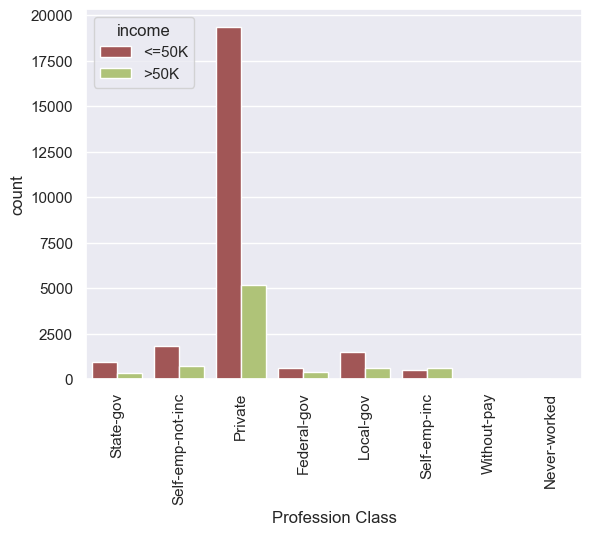

In [41]:
sns.countplot(x = df['Profession Class'], hue=df['income'], palette='tab20b_r')
plt.xticks(rotation = 90)
plt.show()

**The profession class “Private” has a larger population than all other profession classes.**<br>
**Also the profession class “Private” is a major source of providing income greater than 50K.**

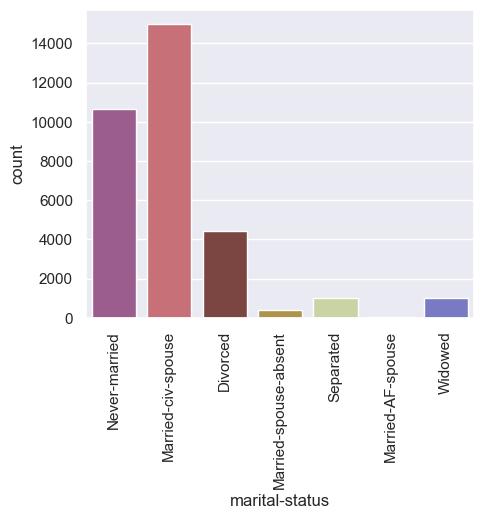

In [42]:
plt.figure(figsize = (5,4))
sns.countplot(x = df['marital-status'], palette='tab20b_r')
plt.xticks(rotation = 90)
plt.show()

In [43]:
country_max = df[df['income']=='>50K']['country'].value_counts().reset_index().rename(columns = {'index':'country', 'country':'count_>50K'})
country_min = pd.DataFrame(df[df['income']=='<=50K']['country'].value_counts().reset_index()).rename(columns = {'index':'country', 'country':'count_<=50K'})

In [44]:
# Merge the dataframes country_max and country_min
country = pd.merge(country_max, country_min, on = 'country', how='inner')
country.sort_values(by = ['count_>50K'],ascending = False, ignore_index = True, inplace =True)
cnt = country[country['country']!='United-States']
country

,country,count_>50K,count_<=50K
0,United-States,7315,22420
1,Philippines,61,137
2,Germany,44,93
3,India,40,60
4,Canada,39,82
5,Mexico,33,606
6,England,30,60
7,Italy,25,48
8,Cuba,25,70
9,Japan,24,38


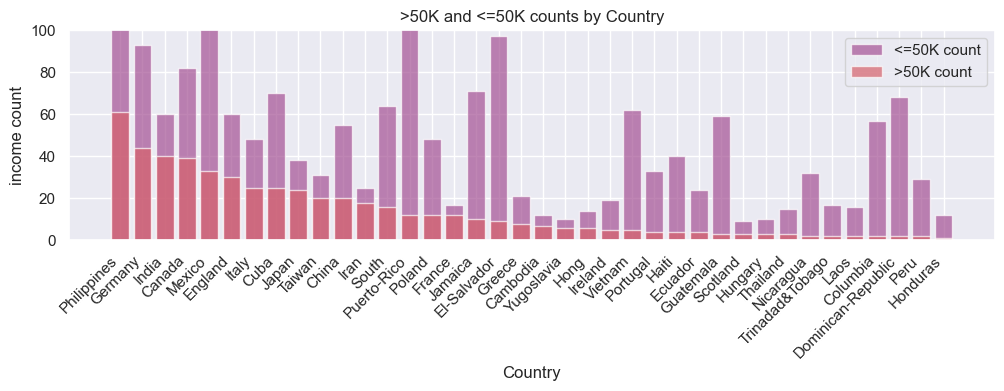

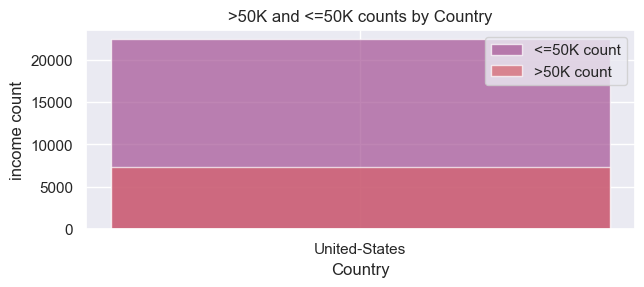

In [45]:
plt.figure(figsize=(10, 6))
sns.set_palette('tab20b_r')

plt.subplot(2,1,1)
plt.bar(cnt['country'], cnt['count_<=50K'], label='<=50K count',  alpha=0.7)
plt.bar(cnt['country'], cnt['count_>50K'], label='>50K count',  alpha=0.7 )

plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xlabel('Country')
plt.ylabel('income count')
plt.title('>50K and <=50K counts by Country')
plt.legend()
plt.show()


plt.subplot(2,1,2)
#sns.set_palette('tab20b_r')
plt.bar('United-States', 22420, label='<=50K count',  alpha=0.7)
plt.bar('United-States', 7315, label='>50K count',  alpha=0.7 )


plt.tight_layout()
plt.xlabel('Country')
plt.ylabel('income count')
plt.title('>50K and <=50K counts by Country')
plt.legend()

plt.show()

**In the population, the United States is the major source of providing income greater than 50K.** <br>
**The US has almost 5000 people with income greater than 50K, while other countries have populations in the hundreds only.**

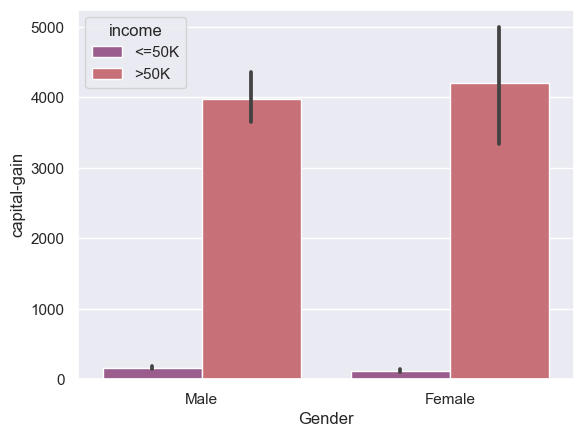

In [46]:
sns.barplot(y = df['capital-gain'],x = df['Gender'], hue = df['income'])
plt.show()

In [47]:
df[(df['capital-gain']!=0) & ((df['Age'] > 20) & (df['Age']<30)) ]

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
113,28,Private,377869,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,4064,0,25,United-States,<=50K
279,24,Private,279472,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,7298,0,48,United-States,>50K
598,25,Private,200408,Some-college,10,Never-married,Tech-support,Not-in-family,White,Male,2174,0,40,United-States,<=50K
613,26,Local-gov,208122,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,1055,0,40,United-States,<=50K
651,24,Private,556660,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,Male,4101,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31800,29,Private,413297,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,3411,0,70,Mexico,<=50K
32048,21,Private,213015,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,2176,0,40,United-States,<=50K
32051,22,Private,205940,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,1055,0,30,United-States,<=50K
32155,23,Private,142766,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,1055,0,20,United-States,<=50K


### 4. Encoding

In [48]:
columns()

Columns:

['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num', 'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income']

No. of columns: 15

****************************************************************************************************
Object columns:

['Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'country', 'income']

No. of object columns: 9

****************************************************************************************************
Integer columns:

['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

No. of integer columns: 6


In [49]:
unq

,Features,count
0,Gender,2
1,income,2
2,race,5
3,relationship,6
4,marital-status,7
5,Profession Class,9
6,occupation,15
7,Education,16
8,Education-num,16
9,country,42


In [50]:
# Here, encoding is getting performed on following variables: 'Gender', 'income', 'Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'country'
print(df['Gender'].value_counts())
print(df['income'].value_counts())

Male      21775
Female    10762
Name: Gender, dtype: int64
<=50K    24698
>50K      7839
Name: income, dtype: int64


In [51]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})

In [52]:
df['income'] = df['income'].replace(['<=50K', '>50K'],[0,1])

In [53]:
print(df['Gender'].value_counts())
print(df['income'].value_counts())

1    21775
0    10762
Name: Gender, dtype: int64
0    24698
1     7839
Name: income, dtype: int64


In [54]:
df = pd.get_dummies(data = df, columns = ['Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'country'], drop_first = True)

In [55]:
df.shape

(32537, 98)

In [56]:
df.columns

Index(['Age', 'Final_census', 'Education-num', 'Gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income',
       'Profession Class_Local-gov', 'Profession Class_Never-worked',
       'Profession Class_Private', 'Profession Class_Self-emp-inc',
       'Profession Class_Self-emp-not-inc', 'Profession Class_State-gov',
       'Profession Class_Without-pay', 'Education_11th', 'Education_12th',
       'Education_1st-4th', 'Education_5th-6th', 'Education_7th-8th',
       'Education_9th', 'Education_Assoc-acdm', 'Education_Assoc-voc',
       'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad',
       'Education_Masters', 'Education_Preschool', 'Education_Prof-school',
       'Education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation

### 5. Split the data into dependent and independent variables

In [57]:
x = df.drop(['income'], axis = 1) # independent variables
y = df[['income']] # dependent variable

In [58]:
x.head(1)

,Age,Final_census,Education-num,Gender,capital-gain,capital-loss,hours-per-week,Profession Class_Local-gov,Profession Class_Never-worked,Profession Class_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
y.head(1)

,income
0,0


### 6. Handling outliers

In [60]:
df.describe().T[:7]

,count,mean,std,min,25%,50%,75%,max
Age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
Final_census,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
Education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
Gender,32537.0,0.669238,0.470495,0.0,0.0,1.0,1.0,1.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


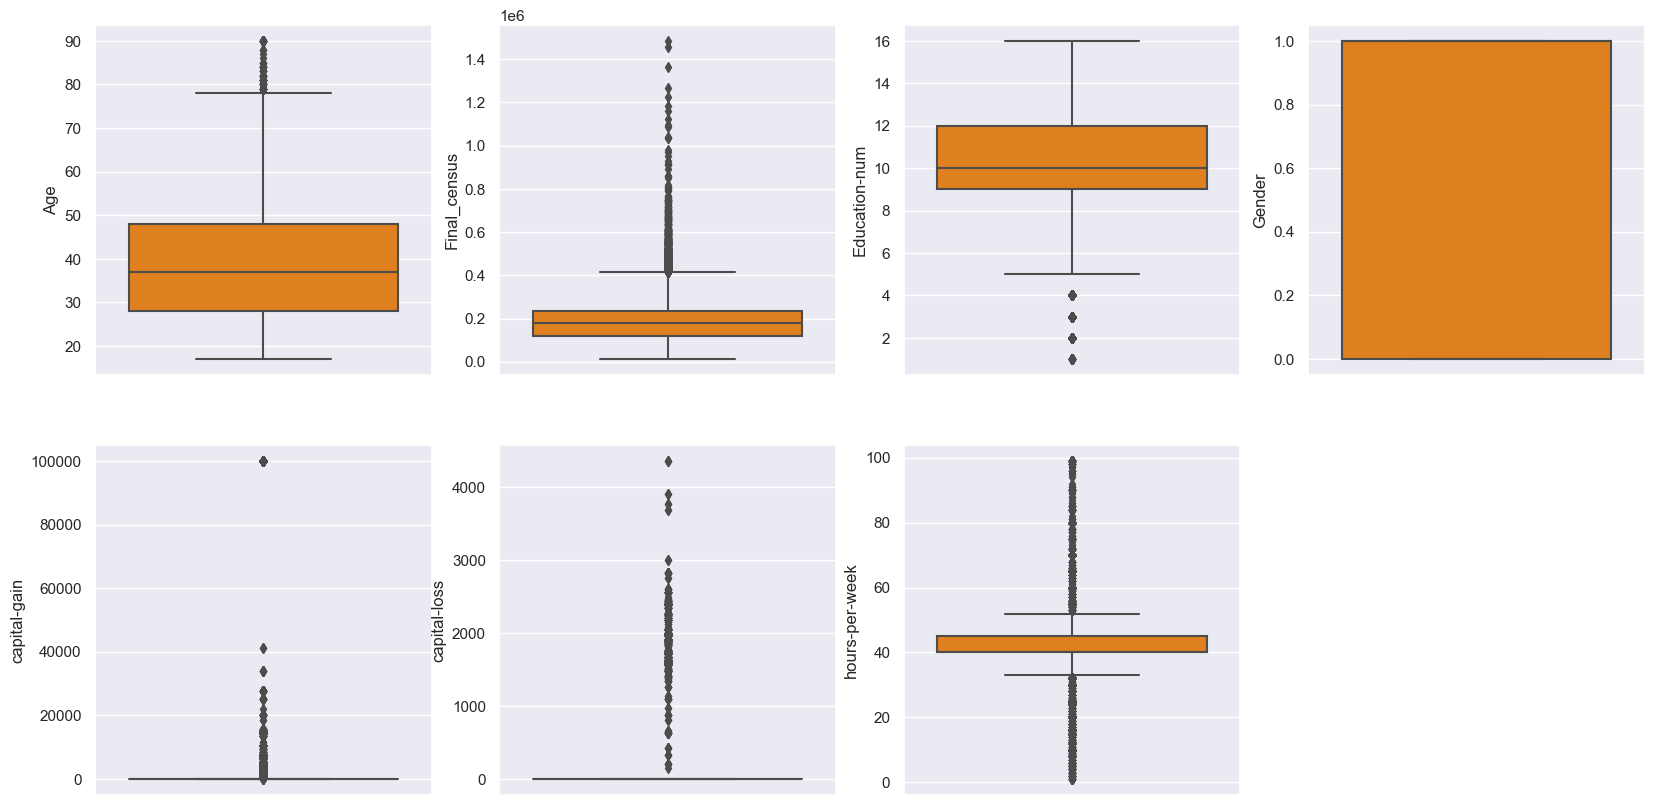

In [61]:
plt.figure(figsize = (20,10))
for a, i in enumerate(df.columns.tolist()[:7]):
    plt.subplot(2,4,a+1)
    sns.boxplot(y = df[i],palette = 'autumn')
plt.show()

**Examining the features, all values for each feature are crucial for data evaluation. Therefore, outliers are not being removed in this analysis.**

### 7. Correlation

In [62]:
# plt.figure(figsize = (50,50))
# sns.heatmap(data = df.corr(), annot = True, cmap = 'rainbow')
# plt.show()

### 7. Feature Scaling

**Here, upon observing the value ranges of certain features, we can conclude that they require data scaling.**<br>
**The features in question are as follows: Final_census, capital-gain, and capital-loss.**

In [63]:
# Normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm_x = norm.fit_transform(x)
norm_y = norm.fit_transform(y)

In [64]:
pd.DataFrame(norm_x)

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.000503,0.999607,0.000168,0.000013,0.028035,0.0,0.000516,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,0.0,0.0
1,0.000600,1.000000,0.000156,0.000012,0.000000,0.0,0.000156,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.0,0.0
2,0.000176,1.000000,0.000042,0.000005,0.000000,0.0,0.000185,0.0,0.0,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0
3,0.000226,1.000000,0.000030,0.000004,0.000000,0.0,0.000170,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0
4,0.000083,1.000000,0.000038,0.000000,0.000000,0.0,0.000118,0.0,0.0,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.000105,1.000000,0.000047,0.000000,0.000000,0.0,0.000148,0.0,0.0,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0
32533,0.000259,1.000000,0.000058,0.000006,0.000000,0.0,0.000259,0.0,0.0,0.000006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.0,0.0
32534,0.000382,1.000000,0.000059,0.000000,0.000000,0.0,0.000263,0.0,0.0,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,0.0,0.0
32535,0.000109,1.000000,0.000045,0.000005,0.000000,0.0,0.000099,0.0,0.0,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0


In [65]:
norm_y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

### 8. Handling Imbalance Data

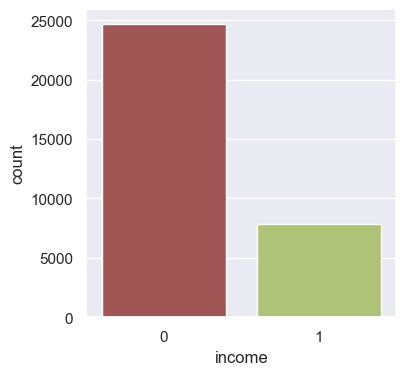

In [66]:
plt.figure(figsize = (4,4))
sns.countplot(x = df['income'], palette = 'tab20b_r')
plt.show()

In [67]:
y.value_counts()

income
0         24698
1          7839
dtype: int64

**Upon observing the values, we conclude that this is an imbalance data.**

In [68]:
# Handling imbalance data using over_sampling.
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 100)
ros_x, ros_y = ros.fit_resample(norm_x, y)

In [69]:
ros_y.value_counts()

income
0         24698
1         24698
dtype: int64

# Model Building

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(ros_x, ros_y, test_size = 0.25, random_state = 100)

In [72]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(37047, 97) (12349, 97) (37047, 1) (12349, 1)


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

### 1. Random Forest Model

> **Build the model**

In [74]:
rf_model = RandomForestClassifier(random_state = 100, max_depth = 23)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=23, random_state=100)

> **Predict the values**

In [75]:
y_predict_train = rf_model.predict(x_train)
y_predict_test= rf_model.predict(x_test)

> **Evaluate the model**

In [76]:
# Accuracy
print(f'Train Accuracy: {accuracy_score(y_train, y_predict_train)}\nTest Accuracy: {accuracy_score(y_test, y_predict_test )}')

Train Accuracy: 0.9282263071233838
Test Accuracy: 0.8834723459389424


In [77]:
# Classification Report
print(f'Classification Report for train data:\n\n{classification_report(y_train, y_predict_train)}\n')
print(f'Classification Report for test data:\n\n{classification_report(y_test, y_predict_test)}')

Classification Report for train data:

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     18520
           1       0.88      0.99      0.93     18527

    accuracy                           0.93     37047
   macro avg       0.94      0.93      0.93     37047
weighted avg       0.94      0.93      0.93     37047


Classification Report for test data:

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      6178
           1       0.83      0.97      0.89      6171

    accuracy                           0.88     12349
   macro avg       0.89      0.88      0.88     12349
weighted avg       0.89      0.88      0.88     12349



In [78]:
# Confusion Matrix
print(f'Confusion Matrix for train data:\n{confusion_matrix(y_train, y_predict_train)}\n')
print(f'Confusion Matrix for test data:\n{confusion_matrix(y_test, y_predict_test)}')

Confusion Matrix for train data:
[[16019  2501]
 [  158 18369]]

Confusion Matrix for test data:
[[4951 1227]
 [ 212 5959]]


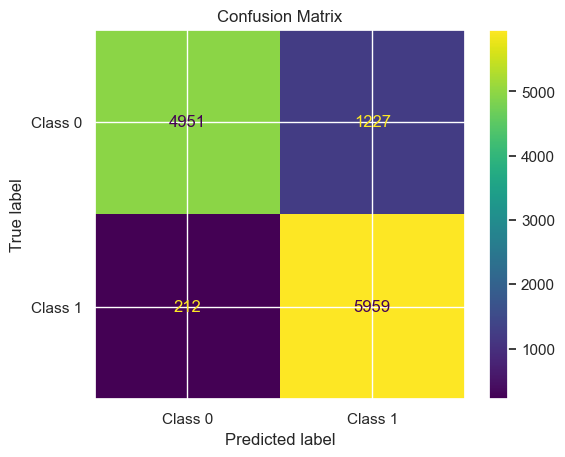

In [79]:
# Plot confusion matrix for test data
plot_confusion_matrix(rf_model, x_test, y_test, display_labels = ['Class 0', 'Class 1'])
plt.title ('Confusion Matrix')
plt.show()

In [80]:
# Feature Importance
def feature_imporatance(model):
    f_imp = model.feature_importances_
    f_imp_df = pd.DataFrame({'Features': x.columns, 'importance':f_imp})
    f_imp_df = f_imp_df.sort_values(by = 'importance', ascending = False, ignore_index = True)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(f_imp_df)

In [81]:
feature_imporatance(rf_model)

                                Features  importance
0      marital-status_Married-civ-spouse    0.167662
1           marital-status_Never-married    0.083916
2                           Final_census    0.064361
3                           capital-gain    0.049151
4                                    Age    0.045958
5                         hours-per-week    0.042186
6                 relationship_Own-child    0.042027
7                          Education-num    0.041610
8                                 Gender    0.039858
9             relationship_Not-in-family    0.039265
10                   Education_Bachelors    0.028108
11            occupation_Exec-managerial    0.026632
12              Profession Class_Private    0.021114
13                            race_White    0.020522
14                 country_United-States    0.020262
15                     Education_HS-grad    0.019964
16                relationship_Unmarried    0.018819
17              occupation_Other-service    0.

In [82]:
# roc_auc_score for test data
rf_model_roc_auc_score = roc_auc_score(y_test, y_predict_test)
print(f'The roc_auc_score for rf model is: {rf_model_roc_auc_score}')

The roc_auc_score for rf model is: 0.8835188993474473


In [83]:
# fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)
print(f'fpr: {fpr}\ntpr: {tpr}\nthresholds: {thresholds}')

fpr: [0.         0.19860796 1.        ]
tpr: [0.         0.96564576 1.        ]
thresholds: [2 1 0]


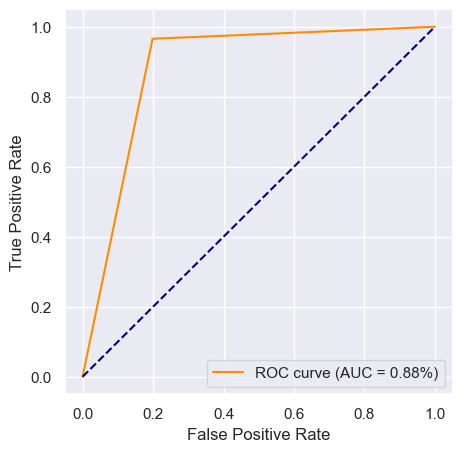

In [84]:
# Plotting AUC & ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = f"ROC curve (AUC = {rf_model_roc_auc_score :.2f}%)", color = 'darkorange' )
plt.plot([0,1],[0,1], ls = '--', color = 'navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

> **Cross validation**

In [85]:
train_cv = cross_val_score(rf_model, x_train, y_train, cv = 10)
test_cv = cross_val_score(rf_model, x_test, y_test, cv =10)

In [86]:
print(f'Avg.train_cv:{np.mean(train_cv)}\nAvg.test_cv:{np.mean(test_cv)}' )

Avg.train_cv:0.8814746431621503
Avg.test_cv:0.8444411708738245


<br>

In [87]:
def model(model):
    #Prediction
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    
    # Accuracy
    print('*'*50,'Accuracy Score', '*'*50)
    print(f'Train Accuracy: {accuracy_score(y_train, y_predict_train)}\nTest Accuracy: {accuracy_score(y_test, y_predict_test )}\n')
    
    # Classification Report
    print('*'*50,'Classification Report', '*'*50)
    print(f'Classification Report for train data:\n\n{classification_report(y_train, y_predict_train)}\n')
    print(f'Classification Report for test data:\n\n{classification_report(y_test, y_predict_test)}')
    
    # Confusion matrix
    print('*'*50,'Confusion Matrix', '*'*50)
    print(f'Confusion Matrix for train data:\n{confusion_matrix(y_train, y_predict_train)}\n')
    print(f'Confusion Matrix for test data:\n{confusion_matrix(y_test, y_predict_test)}')
    
    plot_confusion_matrix(model, x_test, y_test, display_labels = ['Class 0', 'Class 1'])
    plt.title ('Confusion Matrix')
    plt.show()
    
    # ROC & AUc
    print('*'*50,'ROC & AUC', '*'*50)
    rf_model_roc_auc_score = roc_auc_score(y_test, y_predict_test)
    print(f'The roc_auc_score for rf model is: {rf_model_roc_auc_score}\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)
    print(f'fpr: {fpr}\ntpr: {tpr}\nthresholds: {thresholds}')
    
    # Plotting AUC & ROC curve
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = f"ROC curve (AUC = {rf_model_roc_auc_score :.2f}%)", color = 'darkorange' )
    plt.plot([0,1],[0,1], ls = '--', color = 'navy')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

    # Cross Validation
    print('*'*50,'Cross Validation', '*'*50)
    
    train_cv = cross_val_score(model, x_train, y_train, cv = 10)
    test_cv = cross_val_score(model, x_test, y_test, cv =10)
    
    print(f'Avg.train_cv:{np.mean(train_cv)}\nAvg.test_cv:{np.mean(test_cv)}' )

### 2. Decision Tree

> **Build the model**

In [88]:
dt_model = DecisionTreeClassifier(random_state = 100, max_depth = 13)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, random_state=100)

In [89]:
feature_imporatance(dt_model)

                                Features  importance
0      marital-status_Married-civ-spouse    0.485167
1                           capital-gain    0.095028
2                           Final_census    0.051409
3                    Education_Bachelors    0.034124
4                                    Age    0.029289
5                      Education_Masters    0.027344
6             occupation_Exec-managerial    0.027206
7                  Education_Prof-school    0.023497
8                          Education-num    0.022404
9                    Education_Doctorate    0.019311
10                        hours-per-week    0.019215
11                Education_Some-college    0.013473
12                                Gender    0.009469
13     Profession Class_Self-emp-not-inc    0.009364
14                     Education_HS-grad    0.009312
15            relationship_Not-in-family    0.009185
16              occupation_Other-service    0.007902
17                 country_United-States    0.

> **Evaluate the Model**

************************************************** Accuracy Score **************************************************
Train Accuracy: 0.8421734553405134
Test Accuracy: 0.8211191189570005

************************************************** Classification Report **************************************************
Classification Report for train data:

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     18520
           1       0.79      0.92      0.85     18527

    accuracy                           0.84     37047
   macro avg       0.85      0.84      0.84     37047
weighted avg       0.85      0.84      0.84     37047


Classification Report for test data:

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      6178
           1       0.77      0.91      0.84      6171

    accuracy                           0.82     12349
   macro avg       0.83      0.82      0.82     12349
weighted avg

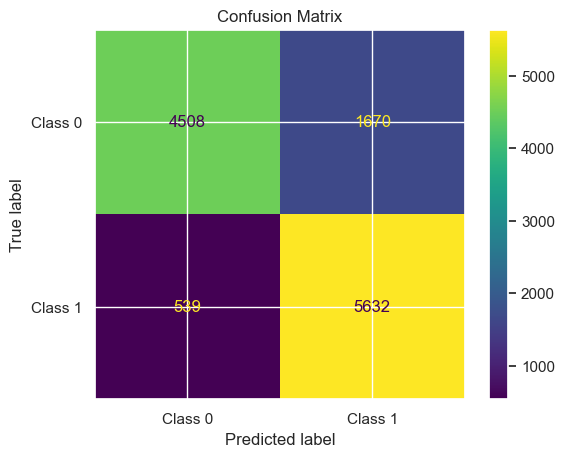

************************************************** ROC & AUC **************************************************
The roc_auc_score for rf model is: 0.8211709769990575

fpr: [0.         0.27031402 1.        ]
tpr: [0.         0.91265597 1.        ]
thresholds: [2 1 0]


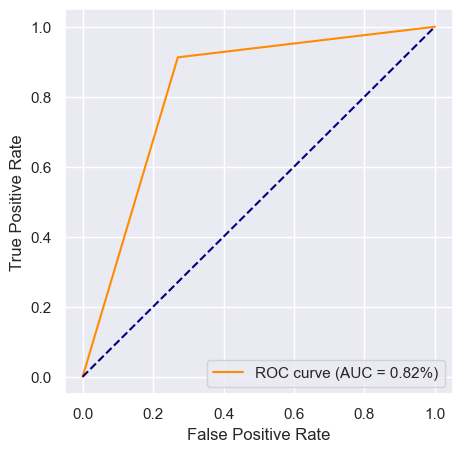

************************************************** Cross Validation **************************************************
Avg.train_cv:0.8168274878090724
Avg.test_cv:0.8067055558107337


In [90]:
model(dt_model)

### 3. XGBoost

> **Building the model**

In [91]:
from xgboost import XGBClassifier

In [103]:
xg_model = XGBClassifier( )
xg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

> **Evaluate the model**

************************************************** Accuracy Score **************************************************
Train Accuracy: 0.8969147299376468
Test Accuracy: 0.8637946392420439

************************************************** Classification Report **************************************************
Classification Report for train data:

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     18520
           1       0.87      0.94      0.90     18527

    accuracy                           0.90     37047
   macro avg       0.90      0.90      0.90     37047
weighted avg       0.90      0.90      0.90     37047


Classification Report for test data:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      6178
           1       0.83      0.91      0.87      6171

    accuracy                           0.86     12349
   macro avg       0.87      0.86      0.86     12349
weighted avg

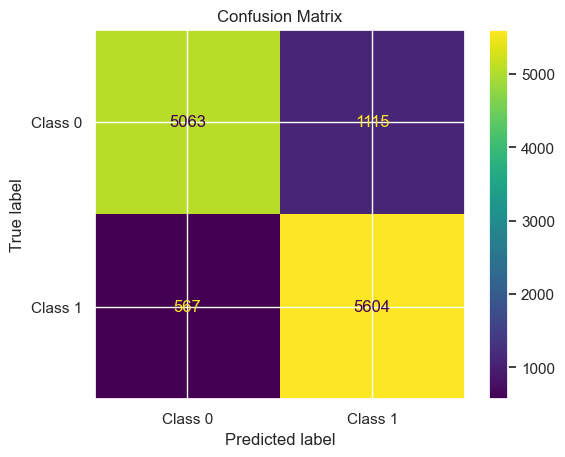

************************************************** ROC & AUC **************************************************
The roc_auc_score for rf model is: 0.8638197499462155

fpr: [0.         0.18047912 1.        ]
tpr: [0.         0.90811862 1.        ]
thresholds: [2 1 0]


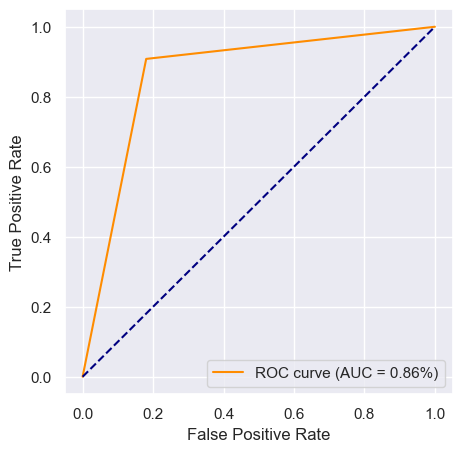

************************************************** Cross Validation **************************************************
Avg.train_cv:0.8611762969893583
Avg.test_cv:0.8428218032926725


In [93]:
model(xg_model)

### 4. Gradient Boosting

> **Build the model**

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

> **Evaluate the model**

************************************************** Accuracy Score **************************************************
Train Accuracy: 0.819580532836667
Test Accuracy: 0.815936513077982

************************************************** Classification Report **************************************************
Classification Report for train data:

              precision    recall  f1-score   support

           0       0.86      0.76      0.81     18520
           1       0.79      0.88      0.83     18527

    accuracy                           0.82     37047
   macro avg       0.82      0.82      0.82     37047
weighted avg       0.82      0.82      0.82     37047


Classification Report for test data:

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      6178
           1       0.78      0.87      0.83      6171

    accuracy                           0.82     12349
   macro avg       0.82      0.82      0.82     12349
weighted avg  

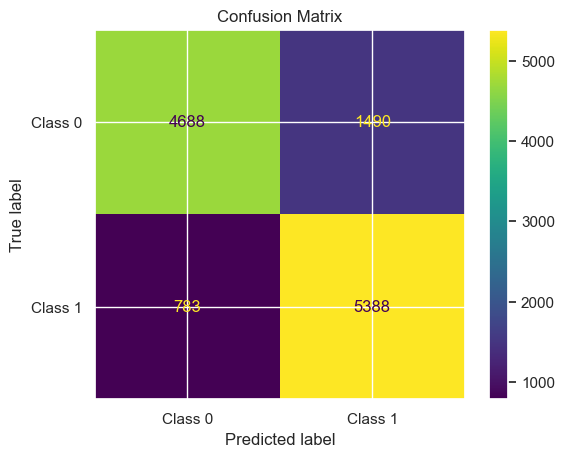

************************************************** ROC & AUC **************************************************
The roc_auc_score for rf model is: 0.8159689068728042

fpr: [0.         0.24117837 1.        ]
tpr: [0.         0.87311619 1.        ]
thresholds: [2 1 0]


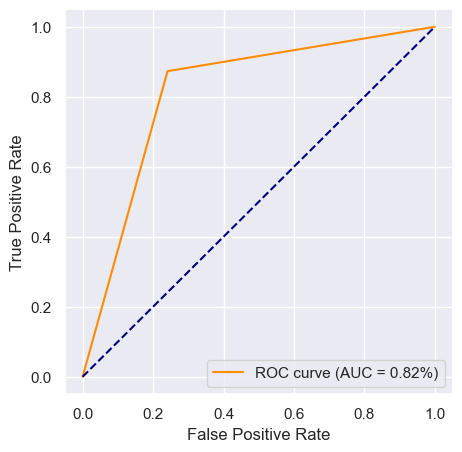

************************************************** Cross Validation **************************************************
Avg.train_cv:0.8156932506128255
Avg.test_cv:0.8103479025452923


In [96]:
model(gb_model)

<br>

In [97]:
# Function for accuracy, cross-validation, f1-score
d = {}
dic = {}
for i, model in {'Random Forest' :rf_model, 'Decision Tree': dt_model, 'Xgboost':xg_model, 'Gradient Boosting':gb_model}.items():
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_predict_train)
    test_accuracy = accuracy_score(y_test, y_predict_test )
    # Cross validation
    train_cv = cross_val_score(model, x_train, y_train, cv = 10)
    test_cv = cross_val_score(model, x_test, y_test, cv =10)
    # Classification report
    cl =classification_report(y_train, y_predict_train, output_dict=True)
    f1_score = cl['macro avg']['f1-score']
    
    d = {}
    d.setdefault('Train_accuracy', train_accuracy)
    d.setdefault('Test_accuracy',test_accuracy)
    d.setdefault('Train_cv', np.mean(test_cv))
    d.setdefault('Test_cv',np.mean(test_cv))
    d.setdefault('Avg.f1-score', f1_score)
    
    dic.setdefault(i, {}).update(d)
    
res_df = pd.DataFrame(dic).T


In [98]:
# Function for generating the confusion matrix of test data.
def conf_matrix():
    models = {'Random Forest': rf_model, 'Decision Tree': dt_model, 'Xgboost': xg_model, 'Gradient Boosting': gb_model}

    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    for ax, (model_name, model) in zip(axes, models.items()):
        y_predict_test = model.predict(x_test)

        plot_confusion_matrix(model, x_test, y_test, display_labels=['Class 0', 'Class 1'], ax=ax, colorbar = False)
        ax.set_title(f'Confusion Matrix - {model_name}')

    plt.tight_layout()
    plt.show()
   

In [99]:
# Function for generating an ROC-AUC curve for test data.
def plot_roc_auc():
    models = {'Random Forest': rf_model, 'Decision Tree': dt_model, 'Xgboost': xg_model, 'Gradient Boosting': gb_model}
        
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    
    for i, (model_name, model) in enumerate(models.items()):
        y_predict_test = model.predict(x_test)
    
        rf_model_roc_auc_score = roc_auc_score(y_test, y_predict_test)
    
        fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)
    
        axes[i].plot(fpr, tpr, label=f"{model_name} (AUC = {rf_model_roc_auc_score:.2f})", color='darkorange')
        axes[i].plot([0, 1], [0, 1], ls='--', color='navy')
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(f'ROC Curve - {model_name}')
        axes[i].legend(loc='lower right')

    plt.tight_layout()
    plt.show()



# Conclusion

In [100]:
res_df

,Train_accuracy,Test_accuracy,Train_cv,Test_cv,Avg.f1-score
Random Forest,0.928226,0.883472,0.844441,0.844441,0.927936
Decision Tree,0.842173,0.821119,0.806706,0.806706,0.841085
Xgboost,0.896915,0.863795,0.842822,0.842822,0.896746
Gradient Boosting,0.819581,0.815937,0.810186,0.810186,0.818983


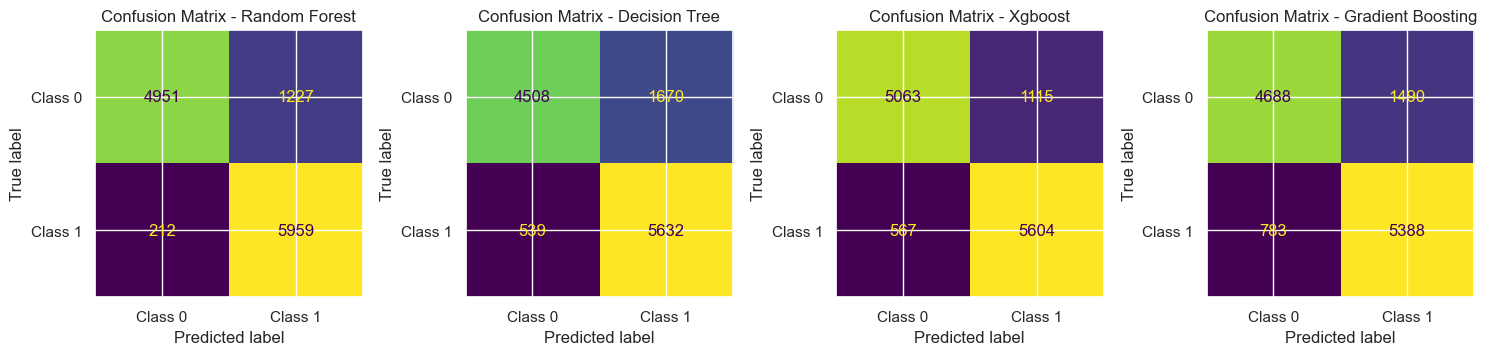

In [101]:
conf_matrix()

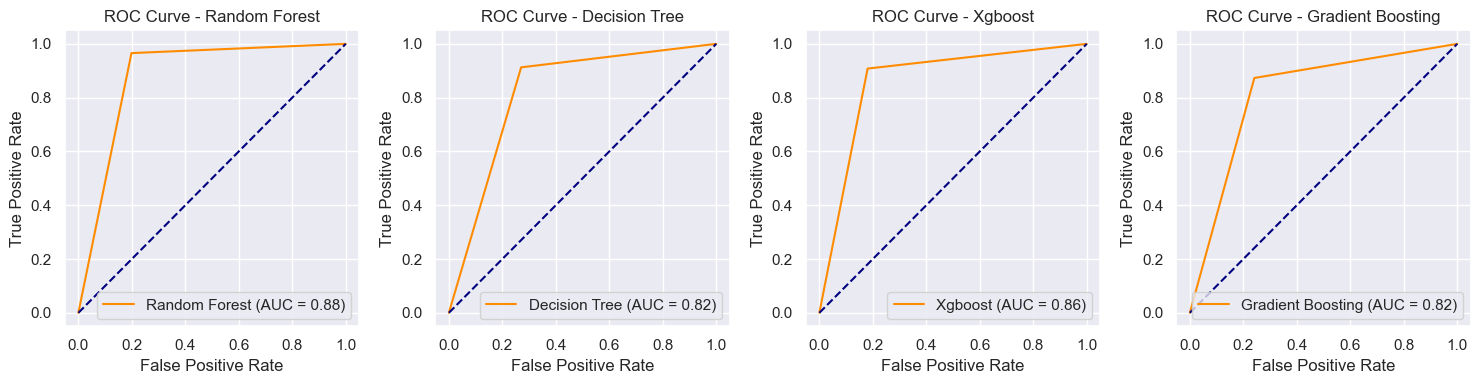

In [102]:
plot_roc_auc()


1. **Upon reviewing the results, it's evident that the random forest model exhibits superior training and testing accuracy compared to other models. The training accuracy stands at approximately 92%, while the testing accuracy is around 88%.**
2. **In the confusion matrix for the random forest, both the false positive and false negative counts are lower compared to other models, with '1227' false positives and '212' false negatives.**
3. **The random forest model outperforms other models with a superior average F1 score, reaching approximately 92%.**
4. **After analyzing the results, it becomes evident that the 'Random Forest Model' is the preferred predictive model.**


### Insights to target individuals with incomes exceeding 50K.

1. In the population, the United States is the major source of providing income greater than 50K.
2. In the populatio, males are more prominent than females

3. The profession class “Private” has a larger population than all other profession classes.
4. Also the profession class “Private” is a major source of providing income greater than 50K.

5. The Population with an education number of 13 have higher chances of having income exceeding 50K.

6. The population count is higher for individuals obtaining capital gain within the age range of 25 to 50.
7. Individuals from any profession class, age group, or marital status may experience capital loss.
8. The population with an age greater than 80 is more likely to incur higher capital losses.

9. The population with the marital status "Married-civ-spouse" and the relationship "Husband" has higher chances of having income greater than 50K.
